![image.png](attachment:e266df0c-f51f-49e1-afb5-4d65c08b7a34.png)



<p style="padding: 10px;
          color:#31A919;
          font-family:Verdana;
          text-align: center;
          font-size:190%;">
CRM Analytics

</p>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
What are CRM Analytics?

CRM analytics are data that demonstrate your company’s sales and customer service performance. CRM analytics also presents customer data that you can use to inform smarter business decisions. Typically, you’ll use CRM software to obtain CRM analytics and automate all your data collection and report generation.    
    
<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Benefits of CRM Analysis
    
The primary benefit of CRM analysis is that you can use it to inform your sales, customer service and marketing processes. You can use your CRM analytics to improve your methods via:

- **Customer service evaluations.** CRM analytics fill you in on your customer service team’s performance. If you see figures that your team could improve, implement practices that push your team toward these goals.
- **Accurate customer data.** Whether you’re using your customer data for demographic marketing or email marketing, you need to know whether you’re reaching the right person. CRM analysis ensures you’re doing just that.
- **Thorough customer analytics.** How much does your customer usually spend per quarter with you? Are they buying the same products time and time again, or does it vary? With CRM analytics, you’ll get firm answers to these questions, and you can use what you learn to refine your marketing strategies.
- **Efficient lead generation.** Your CRM analysis can tell you which of your marketing efforts most strongly correlate to purchases. If you see one approach correlating strongly to purchases but have only targeted a sliver of your customers with that approach, try that method more – your sales might increase.

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "border:2px solid #31A919; background-color:#31A919; color:white; font-family:Verdana;font-size:120%;">Notebook Content</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" target="_self" style = "color:#31A919; font-family:Verdana;font-size:120%;">Libraries and Utilities<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style = "color:#31A919; font-family:Verdana;font-size:120%;">Load and Check Data<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:120%;">Understanding Data<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:120%;">Data Preprocessing<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:120%;">RFM Analysis<span class="badge badge-primary badge-pill">5</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:120%;">Cohort Analysis<span class="badge badge-primary badge-pill">6</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:120%;">Customer Lifetime Value<span class="badge badge-primary badge-pill">7</span></a>

</div>
</div>
</div>

<a id = "1"></a>
    
<span style=" font-family:Verdana; font-size:190%; color:#31A919; ">Libraries and Utilities</span>

In [4]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install plotly
!pip install Lifetimes
!pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import os
import datetime
import squarify
import warnings
import pandas as pd 
import numpy as np
import datetime as dt
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
%matplotlib inline
%load_ext nb_black
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
palette = 'Set2'

<IPython.core.display.Javascript object>

<a id = "2"></a>
<span style=" font-family:Verdana; font-size:190%; color:#31A919; ">Load and Check Data</span>

In [8]:
ecommerce_path = '/content/sample_data/'

df = pd.read_csv(os.path.join(ecommerce_path, 'data.csv'),
                 header = 0,
                 encoding = 'unicode_escape',
                 dtype = {'CustomerID': str,
                          'InvoiceID': str},
                 parse_dates = ['InvoiceDate'], 
                 infer_datetime_format = True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


<IPython.core.display.Javascript object>

<a id = "3"></a>
<span style=" font-family:Verdana; font-size:190%; color:#31A919; ">Understanding Data</span>


<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Context
    
Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

![image.png](attachment:e6de845d-2d48-47a5-b2e6-94f8be262b58.png)

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
📃 Variable Description
    
- **InvoiceNo:** Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
- **StockCode:** Product code that consists 5 digits.
- **Description:** Product name.
- **Quantity:** The quantities of each product per transaction.
- **InvoiceDate:** Represents the day and time when each transaction was generated.
- **UnitPrice:** Product price per unit.
- **CustomerID:** Customer number that consists 5 digits. Each customer has a unique customer ID.
- **Country:** Name of the country where each customer resides.

In [9]:
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_data(df)

------------------------------- SHAPE --------------------------------
Rows: 541909
Columns: 8
------------------------------- TYPES --------------------------------
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object
-------------------------------- HEAD --------------------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 0

<IPython.core.display.Javascript object>

In [10]:
world_map = df[['CustomerID', 'InvoiceNo', 'Country']
              ].groupby(['CustomerID', 'InvoiceNo', 'Country']
                       ).count().reset_index(drop = False)
countries = world_map['Country'].value_counts()
data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names',
            z = countries,
            text = countries.index,
            colorbar = {'title':'Orders'},
            colorscale='Viridis',
            reversescale = False)

layout = dict(title={'text': "Number of Orders by Countries",
                     'y':0.9,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              geo = dict(resolution = 50,
                         showocean = True,
                         oceancolor = "LightBlue",
                         showland = True,
                         landcolor = "whitesmoke",
                         showframe = True),
             template = 'plotly_white',
             height = 600,
             width = 1000)

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate = False)

<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Descriptive Statistics

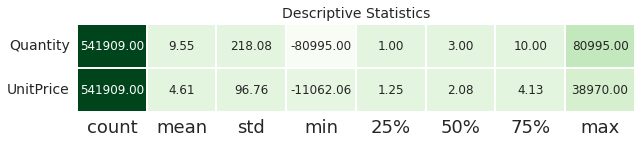

<IPython.core.display.Javascript object>

In [11]:
def desc_stats(dataframe):
    desc_df = pd.DataFrame(index= dataframe.columns, 
                           columns= dataframe.describe().T.columns,
                           data= dataframe.describe().T)
    
    f,ax = plt.subplots(figsize=(10,
                                 desc_df.shape[0] * 0.81))
    sns.heatmap(desc_df,
                annot = True,
                cmap = "Greens",
                fmt = '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.1,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 18)
    plt.yticks(size = 14,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(df.select_dtypes(include = [float, int]))

📌  It is clearly seems that there are ouliters in Quantity and UnitPrice that have to be handled <br />
📌  There are negative values in UnitPrice and Quantity because of **cancelled orders**. <br /> 
📌  Missing values in Customer ID and Description. <br />
📌  Quantity and Unit Price should be multiplied in order to create **Total Price**.               


<a id = "4"></a>
<span style=" font-family:Verdana; font-size:190%; color:#31A919; ">Data Preprocessing</span>

In [12]:
def replace_with_thresholds(dataframe, variable, q1 = 0.25, q3 = 0.75):
    
    '''
    Detects outliers with IQR method and replaces with thresholds 
    
    '''
    
    df_ = dataframe.copy()
    quartile1 = df_[variable].quantile(q1)
    quartile3 = df_[variable].quantile(q3)
    iqr = quartile3 - quartile1
    
    up_limit = quartile3 + 1.5 * iqr
    low_limit = quartile1 - 1.5 * iqr
    df_.loc[(df_[variable] < low_limit), variable] = low_limit
    df_.loc[(df_[variable] > up_limit), variable] = up_limit
    
    return df_

def ecommerce_preprocess(dataframe):
    df_ = dataframe.copy()
    
    #Missing Values
    df_ = df_.dropna()
    
    #Cancelled Orders & Quantity
    df_ = df_[~df_['InvoiceNo'].str.contains('C', na = False)]
    df_ = df_[df_['Quantity'] > 0]
    
    #Replacing Outliers
    df_ = replace_with_thresholds(df_, "Quantity", q1 = 0.01, q3 = 0.99)
    df_ = replace_with_thresholds(df_, "UnitPrice", q1 = 0.01, q3 = 0.99)
    
    #Total Price
    df_["TotalPrice"] = df_["Quantity"] * df_["UnitPrice"]
    
    return df_

<IPython.core.display.Javascript object>

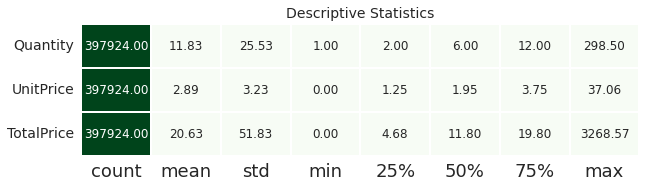

<IPython.core.display.Javascript object>

In [13]:
df = ecommerce_preprocess(df)

desc_stats(df.select_dtypes(include = [float, int]))

<a id = "5"></a>
<span style=" font-family:Verdana; font-size:190%; color:#31A919; ">RFM Analysis</span>

RFM stands for **Recency**, **Frequency**, and **Monetary** value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.   

RFM factors illustrate these facts:

- The more recent the purchase, the more responsive the customer is to promotions
- The more frequently the customer buys, the more engaged and satisfied they are
- Monetary value differentiates heavy spenders from low-value purchasers

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
RFM Metrics

In [14]:
print(df['InvoiceDate'].max())

2011-12-09 12:50:00


<IPython.core.display.Javascript object>

In [22]:
today_date = dt.datetime(2011,12,11)

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                    'InvoiceNo': lambda x: x.nunique(),
                                    'TotalPrice': lambda x: x.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']
rfm = rfm[rfm['monetary'] > 0]
rfm = rfm.reset_index()

rfm.head()

,CustomerID,recency,frequency,monetary
0,12346,326,1,310.44
1,12347,3,7,4310.00
2,12348,76,4,1770.78
3,12349,19,1,1491.72
4,12350,311,1,331.46


<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
RFM Scores

In [23]:
def get_rfm_scores(dataframe):
    
    df_ = dataframe.copy()
    df_['recency_score'] = pd.qcut(df_['recency'],5,labels = [5, 4, 3, 2, 1])
    df_['frequency_score'] = pd.qcut(df_['frequency'].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])
    df_['monetary_score'] = pd.qcut(df_['monetary'], 5, labels = [1, 2, 3, 4, 5])
    df_['RFM_SCORE'] = (df_['recency_score'].astype(str) + df_['frequency_score'].astype(str))
    
    return df_

rfm = get_rfm_scores(rfm)

<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Segmentation

In [24]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex = True)

rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346,326,1,310.44,1,1,2,11,hibernating
1,12347,3,7,4310.00,5,5,5,55,champions
2,12348,76,4,1770.78,2,4,4,24,at_Risk
3,12349,19,1,1491.72,4,1,4,41,promising
4,12350,311,1,331.46,1,1,2,11,hibernating


<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Segmentation Map

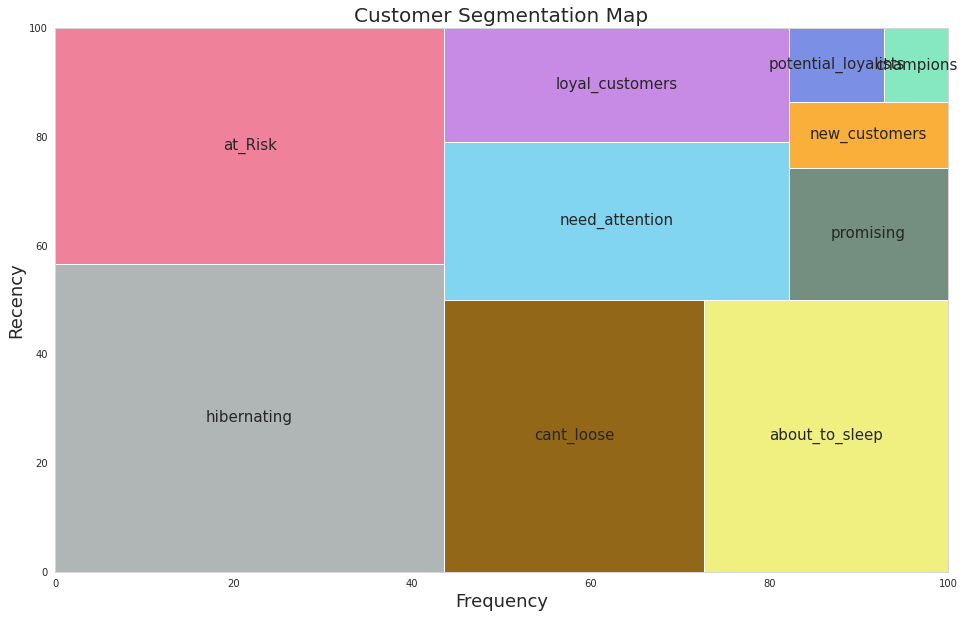

<IPython.core.display.Javascript object>

In [25]:
segments = rfm['segment'].value_counts().sort_values(ascending = False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(sizes=segments,
              label=[label for label in seg_map.values()],
              color=['#AFB6B5', '#F0819A', '#926717', '#F0F081', '#81D5F0',
                     '#C78BE5', '#748E80', '#FAAF3A', '#7B8FE4', '#86E8C0'],
              pad = False,
              bar_kwargs = {'alpha': 1},
              text_kwargs = {'fontsize':15})
plt.title("Customer Segmentation Map", fontsize = 20)
plt.xlabel('Frequency', fontsize = 18)
plt.ylabel('Recency', fontsize = 18)
plt.show()

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Model Evaluation

In [26]:
print(' RFM Model Evaluation '.center(70, '='))
X = rfm[['recency_score', 'frequency_score']]
labels = rfm['segment']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}')

======================== RFM Model Evaluation ========================
Number of Observations: 4338
Number of Segments: 10
Silhouette Score: 0.471
Calinski Harabasz Score: 4590.526
Davies Bouldin Score: 0.633 


<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Segment Analysis

In [27]:
rfm[['recency','monetary','frequency','segment']]\
.groupby('segment')\
.agg({'mean','std','max','min'})

recency                         monetary              \
                           mean  max        std min         mean         max   
segment                                                                        
about_to_sleep        53.312500   72  10.943474  34   469.058097    6207.670   
at_Risk              153.785835  374  68.618828  73   938.458341   11072.670   
cant_loose           132.968254  373  65.250378  73  2646.822540   10254.180   
champions              6.361769   13   3.683300   1  6498.612978  266163.525   
hibernating          217.605042  374  92.013560  73   398.573036    9182.345   
loyal_customers       33.608059   72  15.577050  15  2752.519574  120210.355   
need_attention        52.427807   72  11.552074  34   847.657086    4353.830   
new_customers          7.428571   13   3.902112   1   314.883690     848.550   
potential_loyalists   17.398760   33   9.338808   1   674.628357    4628.750   
promising             23.510638   33   5.192519  15   285.623723    1491.720   

                                           frequency                      
                              std     min       mean  max        std min  
segment                                                                   
about_to_sleep         533.161343    6.20   1.161932    2   0.368913   1  
at_Risk                943.170824   52.00   2.878583    6   0.954415   2  
cant_loose            2008.352354   70.02   8.380952   34   4.289630   6  
champions            18366.105822  198.23  12.417062  210  16.476484   3  
hibernating            553.714975    3.75   1.101774    2   0.302492   1  
loyal_customers       5405.787839   36.56   6.479853   63   4.545669   3  
need_attention         732.298552    6.90   2.326203    3   0.470081   2  
new_customers          174.620952   89.94   1.000000    1   0.000000   1  
potential_loyalists    601.746293   20.80   2.010331    3   0.651401   1  
promising              223.634736   30.00   1.000000    1   0.000000   1

<IPython.core.display.Javascript object>

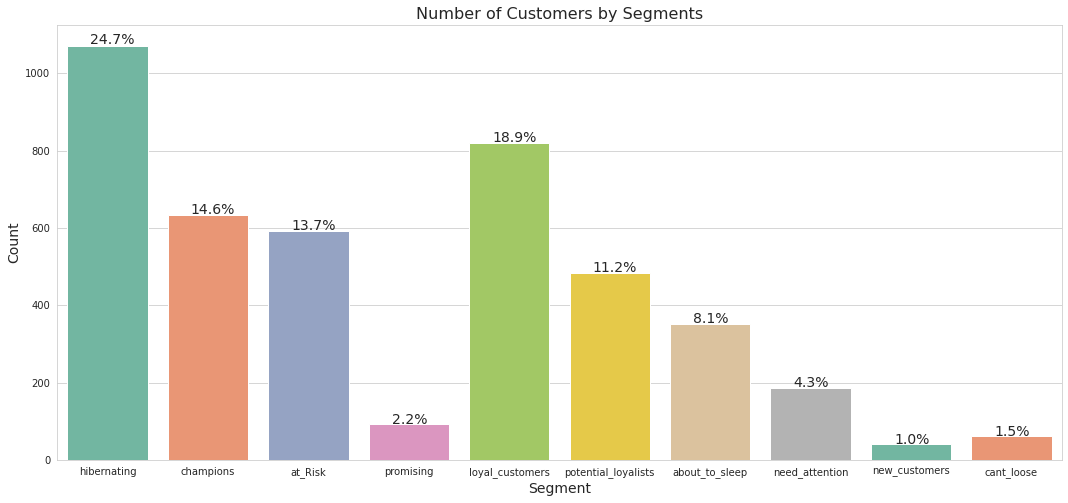

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment',
                   palette = palette)
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

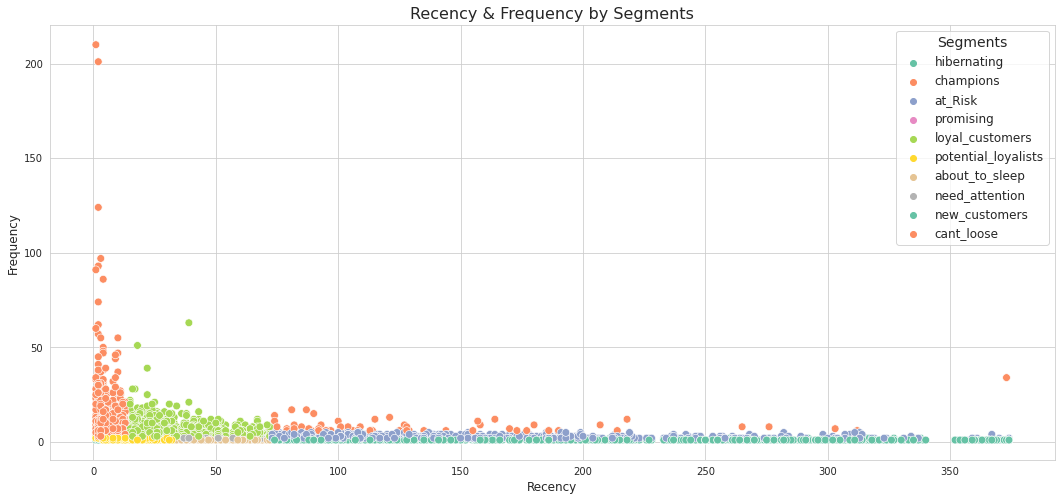

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize = (18, 8))
sns.scatterplot(data = rfm,
                x = 'recency',
                y = 'frequency',
                hue ='segment',
                palette = palette,
                s = 60)
plt.title('Recency & Frequency by Segments', size = 16)
plt.xlabel('Recency', size = 12)
plt.ylabel('Frequency', size = 12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.legend(loc = 'best', fontsize = 12,
           title = 'Segments',title_fontsize=14)
plt.show()

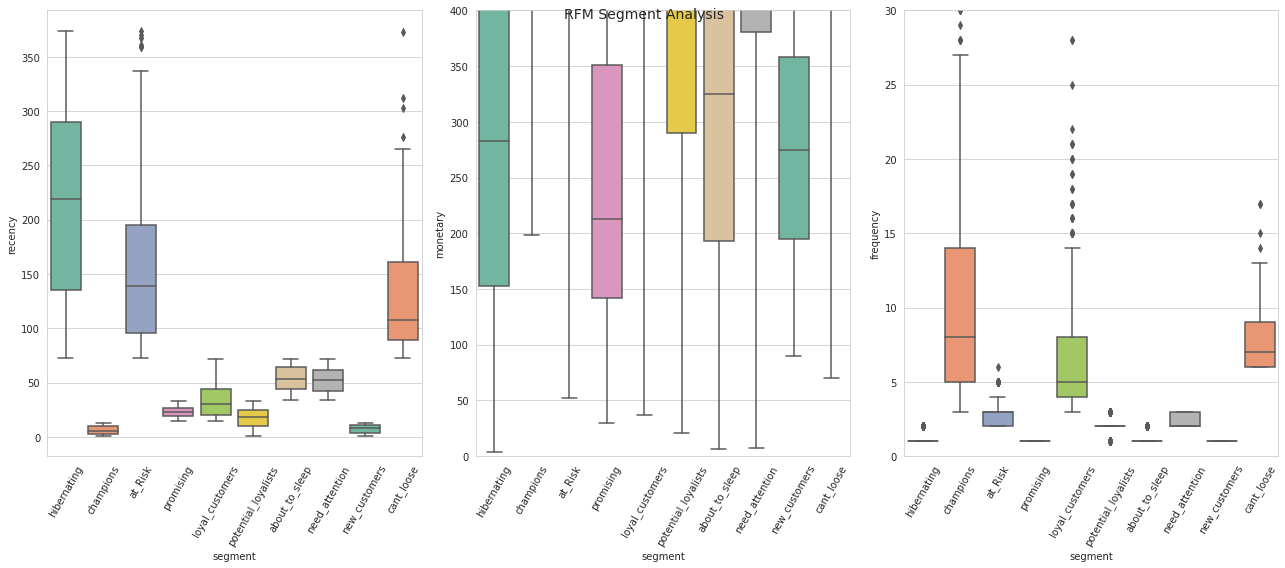

<IPython.core.display.Javascript object>

In [30]:
fig, axes = plt.subplots(1, 3, figsize = (18, 8))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['recency', 'monetary', 'frequency']
for idx, col in enumerate(feature_list):
    sns.boxplot(ax = axes[idx], data = rfm,
                x = 'segment', y = feature_list[idx],
                palette= palette)
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 400])
    if idx == 2:
        axes[idx].set_ylim([0, 30])
plt.tight_layout()
plt.show()

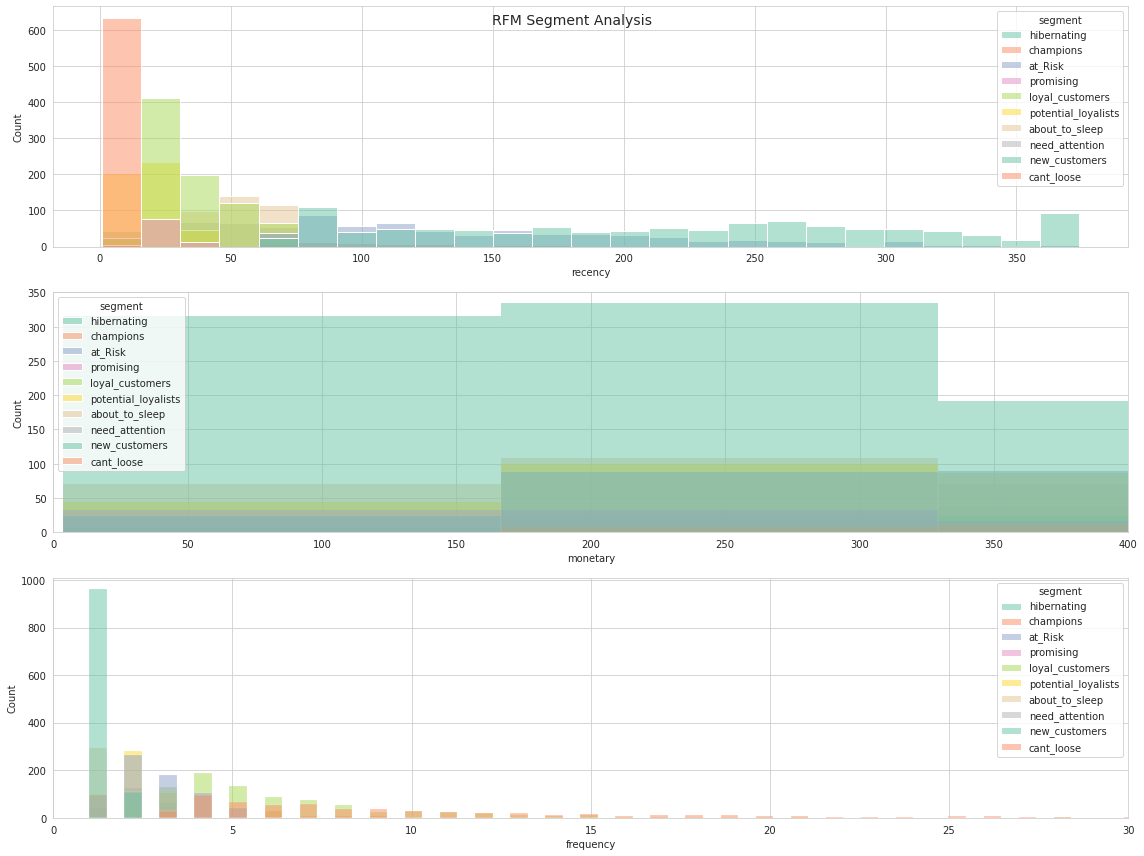

<IPython.core.display.Javascript object>

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['recency', 'monetary', 'frequency']
for idx, col in enumerate(feature_list):
    sns.histplot(ax = axes[idx], data = rfm,
                 hue = 'segment', x = feature_list[idx],
                 palette= palette)
    if idx == 1:
        axes[idx].set_xlim([0, 400])
    if idx == 2:
        axes[idx].set_xlim([0, 30])
plt.tight_layout()
plt.show()

<a id = "6"></a>
<span style=" font-family:Verdana; font-size:190%; color:#31A919; ">Cohort Analysis</span>

A cohort is a group of people sharing something in common, such as the sign-up date to an app, the month of the first purchase, geographical location, acquisition channel (organic users, coming from performance marketing, etc.) and so on. In Cohort Analysis, we track these groups of users over time, to identify some common patterns or behaviors.

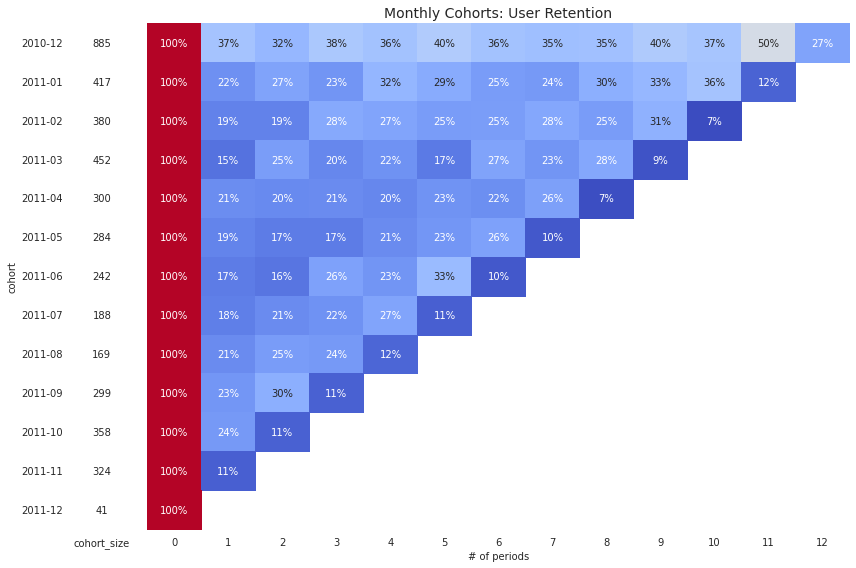

<IPython.core.display.Javascript object>

In [32]:
def CohortAnalysis(dataframe):
    
    data = dataframe.copy()
    data = data[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates()
    data['order_month'] = data['InvoiceDate'].dt.to_period('M')
    data['cohort'] = data.groupby('CustomerID')['InvoiceDate']\
    .transform('min').dt.to_period('M')
    cohort_data = data.groupby(['cohort', 'order_month'])\
    .agg(n_customers=('CustomerID', 'nunique')).reset_index(drop=False)
    cohort_data['period_number'] = (cohort_data.order_month - cohort_data.cohort)\
    .apply(attrgetter('n'))
    cohort_pivot = cohort_data.pivot_table(index = 'cohort',
                                           columns = 'period_number',
                                           values = 'n_customers')
    cohort_size = cohort_pivot.iloc[:,0]
    retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
    with sns.axes_style("white"):
        fig, ax = plt.subplots(1, 2, figsize=(12, 8),
                        sharey=True,
                        gridspec_kw={'width_ratios': [1, 11]})
        sns.heatmap(retention_matrix, 
                    mask = retention_matrix.isnull(), 
                    annot = True,
                    cbar = False,
                    fmt='.0%', 
                    cmap='coolwarm', ax=ax[1])
        ax[1].set_title('Monthly Cohorts: User Retention', fontsize=14)
        ax[1].set(xlabel='# of periods',
                  ylabel='')
        white_cmap = mcolors.ListedColormap(['white'])
        sns.heatmap(pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'}), 
                    annot=True, 
                    cbar = False,
                    fmt='g',
                    cmap=white_cmap,
                    ax=ax[0])
        fig.tight_layout()
    
CohortAnalysis(df)

<a id = "7"></a>
<span style=" font-family:Verdana; font-size:190%; color:#31A919; ">Customer Lifetime Value</span>

Customer lifetime value is how much money a customer will bring your brand throughout their entire time as a paying customer.

In [33]:
cltv_df = df.groupby('CustomerID').agg({'InvoiceDate': [lambda x: (x.max() - x.min()).days,
                                                        lambda x: (today_date - x.min()).days], 
                                        'InvoiceNo': 'nunique',
                                        'TotalPrice': 'sum'})

cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
cltv_df.head()

,recency,T,frequency,monetary
CustomerID,,,,
12346,0,326,1,310.44
12347,365,368,7,4310.00
12348,282,359,4,1770.78
12349,0,19,1,1491.72
12350,0,311,1,331.46


<IPython.core.display.Javascript object>

In [34]:
#Average Order Value
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

#Recency & Tenure
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

#Frequency
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
BG/NBD
    
Beta Geometric / Negative Binomial Distribution models assume that the number of transactions made by each customer follows a Poisson process with a heterogeneity in transaction rates across customers following a **gamma distribution**. These assumptions give us a Negative binomial distribution (NBD) for modeling the number of transactions made by the customer while he is alive. We can build BG/NBD model by using <code>BetaGeoFitter</code> and <code>lifetimes</code> packages.

In [35]:
BGF = BetaGeoFitter(penalizer_coef = 0.001) #avoid overfitting

BGF.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 11.40, b: 2.49, r: 2.18>

<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Top 10 Expected Number of Transaction (1 Week)

In [36]:
BGF.conditional_expected_number_of_purchases_up_to_time(1,
                                                        cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']
                                                       ).sort_values(ascending = False)\
.head(10)\
.to_frame('Expected Number of Transactions')\
.reset_index()

,CustomerID,Expected Number of Transactions
0,12748,3.265158
1,14911,3.126645
2,17841,1.940290
3,13089,1.537528
4,14606,1.463999
5,15311,1.433717
6,12971,1.357024
7,14646,1.222517
8,13408,0.986249
9,18102,0.968607


<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Top 10 Expected Number of Transaction (1 Month)

In [37]:
BGF.conditional_expected_number_of_purchases_up_to_time(4,
                                                        cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']
                                                       ).sort_values(ascending = False)\
.head(10)\
.to_frame('Expected Number of Transactions')\
.reset_index()

,CustomerID,Expected Number of Transactions
0,12748,13.025670
1,14911,12.473095
2,17841,7.740345
3,13089,6.133456
4,14606,5.840269
5,15311,5.719467
6,12971,5.413481
7,14646,4.876360
8,13408,3.934373
9,18102,3.863856


<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Frequency of Repeat Transactions

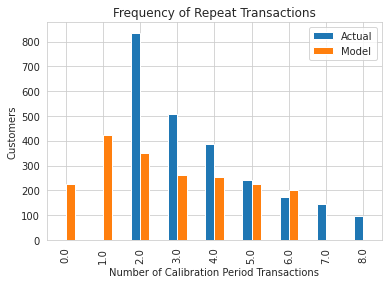

<IPython.core.display.Javascript object>

In [38]:
#Plot a figure with period actual and predicted transactions.
plot_period_transactions(BGF,
                         max_frequency = 7)
plt.show()

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Credits
    
- https://www.businessnewsdaily.com/15918-how-to-use-crm-analytics.html
    
- https://www.analyticsvidhya.com/blog/2021/06/cohort-analysis-using-python-for-beginners-a-hands-on-tutorial/
    
- https://benalexkeen.com/bg-nbd-model-for-customer-base-analysis-in-python/

<span style="color:#31A919;
             font-size:140%;
             font-family:Verdana;">
If you liked this notebook, please upvote 😊

<span style="color:#31A919;
             font-size:140%;
             font-family:Verdana;">
If you have any suggestions or questions, feel free to comment!

<span style="color:#31A919;
             font-size:140%;
             font-family:Verdana;">
Best Wishes!